Blurred image saved as 'blurred_image.png'.


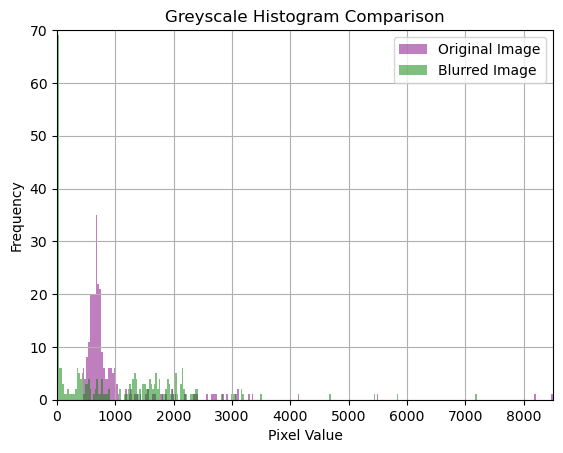

Welch's t-test= 0.0
P-value= 1.0
There is no statistical significance between the histograms of the original and blurred images (p >= 0.05).


In [85]:
#MIPS Compouter Literacy Bootcamp: Coding project
#The following code was written with the help of CoPilot

#Import the necessary libraries
import os
import matplotlib.pyplot as plt 
from PIL import Image
from PIL import ImageOps
from PIL import ImageFilter
from scipy import stats 


#Import a 500x500 pixel image from the local directory and open it
def display_image(image_path): 
    if os.path.exists(image_path): #Check if the image file exists at the specified location
        with Image.open(image_path) as img: #Use 'with' to auto open/close the image file 
            img.show() #Display the image
    else: 
        print("Image file '{}' does not exist.".format(image_path))
def main():
    image_path = "image.png" #Define the file name from the local directory
    display_image(image_path)
if __name__ == "__main__":
    main()

#Blur 'image.png' using Gaussian filter
#Define the location of image
def save_blurred_image(image_path, save_path):
    if os.path.exists(image_path):
        with Image.open(image_path) as img:
            blurred_img = img.filter(ImageFilter.GaussianBlur(radius=5))  #Use Gaussian filter to blur image with a strength of 5
            blurred_img.show() 
            blurred_img.save(save_path) #Save the blurred image to the specified location
            print("Blurred image saved as '{}'.".format(save_path))
    else:
        print("Image file '{}' does not exist.".format(image_path))
def main_save():
    image_path = "image.png"  #File name we want to blur
    save_path = "blurred_image.png"  #Save file name as 'blurred_image.png'
    save_blurred_image(image_path, save_path)
if __name__ == "__main__":
    main_save()
    
#Calculate the grayscale histogram for 'image.png' and 'blurred_image.png'
def calculate_histogram(image_path):
    if os.path.exists(image_path):
        with Image.open(image_path) as img:
            grayscale_img = ImageOps.grayscale(img)  #Convert the image to grayscale
            histogram = grayscale_img.histogram()  #Create the histogram of the grayscale image
            return histogram
    else:
        print("Image file '{}' does not exist.".format(image_path))
        return None
def main_histogram():
    #Locate the files we want to use to calculate the histogram
    original_image_path = "image.png"  
    blurred_image_path = "blurred_image.png"  
    global original_histogram, blurred_histogram #Made these variables global so we can accesss them outisde the function
    #Calculate the histograms for both images
    original_histogram = calculate_histogram(original_image_path)  
    blurred_histogram = calculate_histogram(blurred_image_path)  
    if original_histogram and blurred_histogram:
        print("Original Image Histogram:", original_histogram)
        print("Blurred Image Histogram:", blurred_histogram)
    else:
        print("Could not calculate histograms due to missing files.")
def main():
    main_histogram()  
    main()

#Graph the greascale histogram of 'image.png' and 'blurred_image.png' 
#Add features to the histogram using matplotlib
plt.hist(original_histogram, color='purple', label='Original Image', bins=256, alpha=0.5) #Bins is the number of pixel intensities and alpha is transparaency of the bars
plt.hist(blurred_histogram, color='green', label='Blurred Image', bins=256, alpha=0.5) 
plt.title('Greyscale Histogram Comparison')
plt.xlabel('Pixel Value')
plt.xlim(0, 8500) #Min and max values of x-axis
plt.ylabel('Frequency') 
plt.ylim(0,70) #Min and max values of y-axis
plt.legend()
plt.grid()
plt.show()

#Check for statisitical significant difference between the two histograms using Scipy stats
#Compare the 2 histograms using Welch's t-test to check for statistical significance
t_statistic, p_value = stats.ttest_ind(original_histogram, blurred_histogram, equal_var=False) #Use scipy.stats to perform t-test comparing 2 samples with unequal variance
print("Welch's t-test=", t_statistic)
print("P-value=", p_value)
if p_value < 0.05: #If true, there is statisitcal significance
    print("There is statistical significance between the histograms of the original and blurred images (p < 0.05).")
else:
    print("There is no statistical significance between the histograms of the original and blurred images (p >= 0.05).")

In [86]:
#Downscale saved 'blurred_image.png' to 250x250 pixels and save it as 'downscaled_blurred_image.png' then display it

def downscale_image(image_path, save_path, size=(250, 250)): 
    if os.path.exists(image_path):
        with Image.open(image_path) as img: 
            downscaled_img = img.resize(size, Image.LANCZOS) #Resize the image using the LNACZOS filter
            downscaled_img.save(save_path)
            downscaled_img.show() #Display the image
            print("Downscaled image saved as '{}'.".format(save_path))
    else:
        print("Image file '{}' does not exist.".format(image_path))
def main_downscale():
    image_path = "blurred_image.png"  #Name the image file we want to downscale
    save_path = "downscaled_blurred_image.png"  #Name the file name for the downscaled image
    downscale_image(image_path, save_path)
if __name__ == "__main__":
    main_downscale() 


Downscaled image saved as 'downscaled_blurred_image.png'.
